### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
lugar_de_compra = []

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
suma_ventas = tienda['Precio'].sum()
print(f'La suma de las ventas son {suma_ventas}')

La suma de las ventas son 1150880400.0


In [ ]:
import matplotlib.pyplot as plt

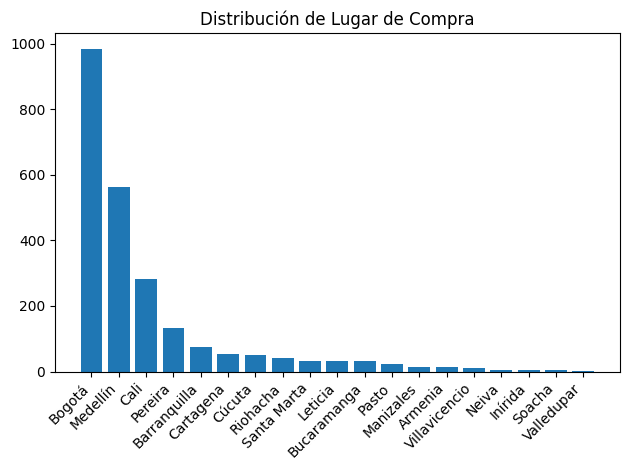

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Move the import and data reading statement here
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
tienda = pd.read_csv(url)

# Calculate the frequency of each 'Lugar de Compra'
lugar_de_compra_counts = tienda['Lugar de Compra'].value_counts()

# Use the index (Lugar de Compra) and values (counts) for the bar chart
# The first argument to plt.bar should be the x values (locations),
# and the second argument should be the height values.
plt.bar(lugar_de_compra_counts.index, lugar_de_compra_counts.values)
plt.title('Distribución de Lugar de Compra')  # Add a title for clarity
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# 2. Ventas por categoría

In [ ]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
categoria = tienda['Categoría del Producto'].value_counts()
print(categoria)

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


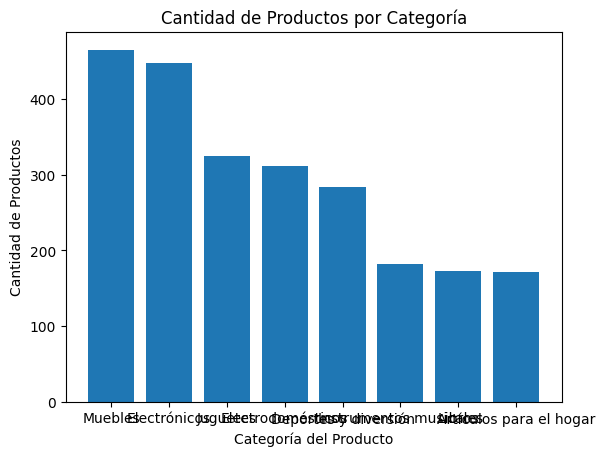

In [ ]:
plt.bar(categoria.index, categoria.values)
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de Productos por Categoría')
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
def promedio(lista: list=[0]) -> float:
  ''' Función para calcular el promedio de notas en una lista

  lista: list, default [0]
    Lista con las notas para calcular el promedio
  return = calculo: float
    Promedio calculado
  '''

  calculo = sum(lista) / len(lista)

  return calculo

In [ ]:
calificacion_promedio = promedio(tienda['Calificación'])
print(f'El promedio por tienda es de {round(calificacion_promedio)}')

El promedio por tienda es de 4


italicized text# 4. Productos más y menos vendidos

In [ ]:
productos_vendidos = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)

producto_mas_vendido = productos_vendidos.idxmax()
print(f'Los productos mas vendidos son {producto_mas_vendido}')
producto_menos_vendido = productos_vendidos.idxmin()
print(f'Los productos menos vendidos son {producto_menos_vendido}')

Los productos mas vendidos son Muebles
Los productos menos vendidos son Artículos para el hogar


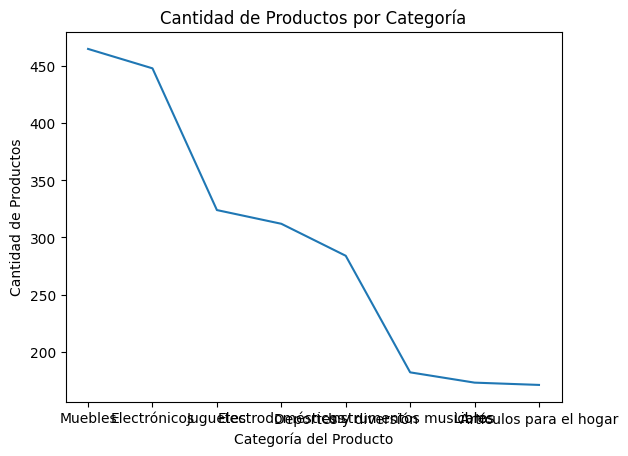

In [ ]:
plt.plot(productos_vendidos.index, productos_vendidos.values) # Changed plt.line to plt.plot for line plotting
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de Productos por Categoría')
plt.show()

In [ ]:
productos_vendidos = tienda['Categoría del Producto'].value_counts()
print(productos_vendidos)
producto_mas_vendido = productos_vendidos.idxmax()
print(producto_mas_vendido)
producto_menos_vendido = productos_vendidos.idxmin()
producto_menos_vendido

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Muebles


'Artículos para el hogar'

# 5. Envío promedio por tienda

In [ ]:
envio_promedio = tienda.groupby('Lugar de Compra')['lon'].mean()
print(f'El envio promedio por tienda es de {round(envio_promedio)}')

El envio promedio por tienda es de Lugar de Compra
Armenia         -76.0
Barranquilla    -75.0
Bogotá          -74.0
Bucaramanga     -73.0
Cali            -77.0
Cartagena       -76.0
Cúcuta          -73.0
Inírida         -68.0
Leticia         -70.0
Manizales       -76.0
Medellín        -76.0
Neiva           -75.0
Pasto           -77.0
Pereira         -76.0
Riohacha        -73.0
Santa Marta     -74.0
Soacha          -74.0
Valledupar      -73.0
Villavicencio   -74.0
Name: lon, dtype: float64
